<a href="https://colab.research.google.com/github/danielmsd1/ML/blob/main/hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Load data**

In [3]:
#load data
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/Dataset/sign_mnist_train.csv")

In [4]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [5]:
def show_img(img,df):
  #extract label 
  label = data_test['label'][img]
  pixels = data_test.iloc[img,1:]
  pixels = np.array(pixels,dtype='uint8')
  pixels = pixels.reshape((28,28))

  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels,cmap='gray')
  plt.show()

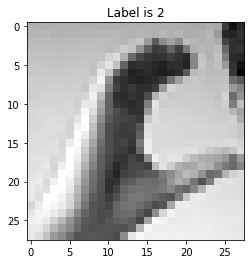

In [6]:
show_img(20,data_test)

**Data Preprocessing**

In [7]:
y_train = data_train['label']
y_test = data_test['label']

del data_train['label']
del data_test['label']

In [8]:
#Label Binarizer
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [9]:
x_train = data_train.values
x_test = data_test.values

In [10]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [11]:
#reshape
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

*Data Augmentation*

In [12]:
data_generator = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening  =False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

In [13]:
data_generator.fit(x_train)

**Build the Model**

In [14]:
model = Sequential()
model.add(Conv2D(75,(3,3),strides=1,padding='same',activation='relu',input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(50,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(25,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation='softmax'))

In [15]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

*Learning rate*

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

*Train the model*

In [17]:
model.fit(data_generator.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 25s 41ms/step - loss: 1.0032 - accuracy: 0.6871 - val_loss: 4.0005 - val_accuracy: 0.0643 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 8s 39ms/step - loss: 0.1908 - accuracy: 0.9362 - val_loss: 1.8776 - val_accuracy: 0.4624 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 8s 39ms/step - loss: 0.0957 - accuracy: 0.9686 - val_loss: 0.1595 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 8s 39ms/step - loss: 0.0610 - accuracy: 0.9806 - val_loss: 0.0664 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 8s 39ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.1735 - val_accuracy: 0.9407 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9887
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 

In [18]:
#checking the final accuracy
model.evaluate(x_test,y_test)

225/225 [==============================] - 1s 3ms/step - loss: 7.1973e-04 - accuracy: 1.0000


[0.0007197303930297494, 1.0]

**Predictions**

In [30]:
predictions = model.predict(x_test)
for i in range(len(predictions)):
  if(np.any([[predictions[i]>=9],[predictions[i]>=25]])):
    predictions[i]+=1
predictions[:5]

array([[4.5927723e-12, 6.0411898e-11, 4.8594273e-08, 1.4264212e-08,
        8.3509061e-10, 2.9041246e-06, 9.9992335e-01, 5.5896926e-05,
        8.1106355e-10, 8.1402864e-13, 4.0096393e-09, 3.5202861e-12,
        6.0103991e-11, 1.1203286e-08, 6.9829453e-09, 5.6344052e-10,
        5.5336020e-13, 6.1881222e-11, 1.7612232e-05, 2.7190290e-14,
        3.7119986e-12, 1.1878326e-11, 8.2189366e-08, 1.6610651e-08],
       [1.1526030e-12, 6.6513040e-09, 1.4317298e-18, 2.7981927e-13,
        7.1495387e-13, 9.9998295e-01, 1.0607373e-18, 1.6129319e-20,
        2.4297495e-07, 4.7940166e-17, 1.8653370e-15, 1.0375345e-17,
        6.5118272e-17, 1.3579360e-18, 5.6095027e-16, 1.2388889e-18,
        4.0651232e-17, 4.3264755e-17, 8.3756183e-14, 1.1609372e-18,
        2.1925262e-13, 1.6826532e-05, 2.6408473e-19, 5.8867605e-10],
       [2.2350994e-20, 9.8183063e-17, 3.3989278e-20, 3.6736950e-12,
        1.7041810e-18, 2.7512183e-16, 1.3839008e-16, 6.1224739e-17,
        1.7350691e-12, 9.9999750e-01, 6.951401

**Save model**

In [31]:
model.save('ishara_gesture_model.h5')